# Analysis 1
- Analyze the historical baseball data and find which teams had the highest batting average and which years were their highest batting average and try to dig a little deeper into why their average was high

In [80]:
# import modules to process data and plot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
# read in the batting csv file
baseball = pd.read_csv('./Data/baseball/core/Batting.csv')

In [69]:
# group by team
grouped_baseball = baseball.groupby('teamID')

In [70]:
# allow the plot to display in the ironpython window
%matplotlib inline

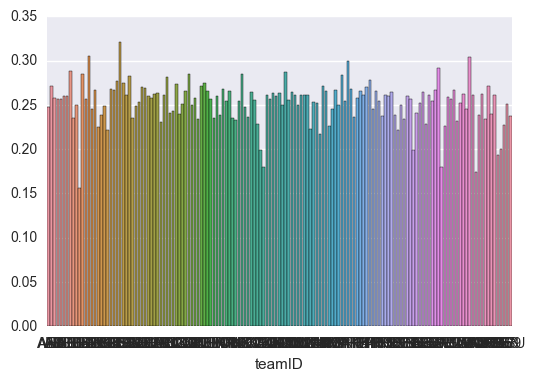

In [71]:
# create a barplot of the data
sns.barplot(grouped_baseball['teamID'].count().index,grouped_baseball['H'].mean()/grouped_baseball['AB'].mean())

# Initial Analysis 1
- The plot above shows only 4 teams had above a .300 average for the team's history.  A look into those four teams will uncover how they were successful

In [72]:
# store the average in a new dataframe
average = pd.DataFrame()
average['average'] = (grouped_baseball['H'].mean()/grouped_baseball['AB'].mean())

In [73]:
# find the averages over .300
average_greater = average[average['average'] > 0.30]

In [86]:
# get the names of the teams whose average is over .300
teams = average_greater.index.values


In [75]:
# pull out the teams from the original data set
baseball_teams = baseball[(baseball['teamID'].isin(teams))]

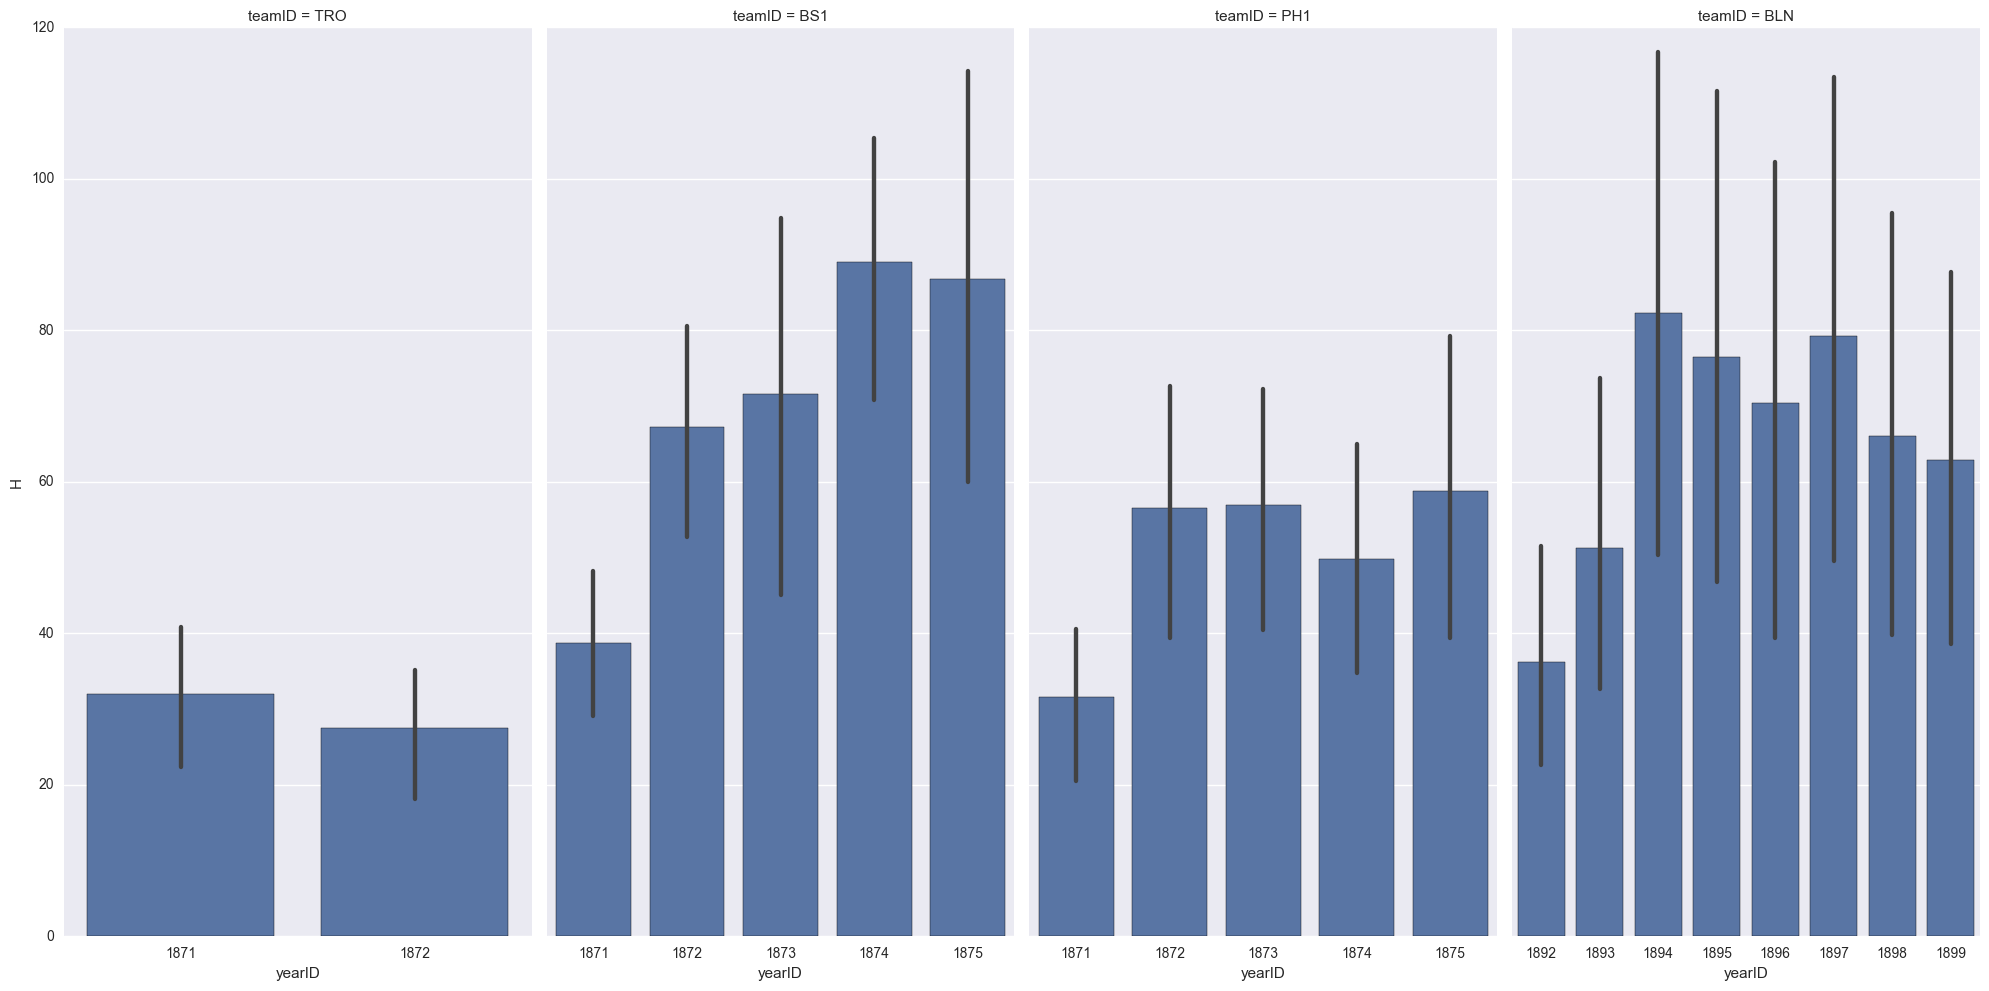

In [175]:
# prepare plot
g = sns.FacetGrid(baseball_teams, col="teamID", size=10, aspect=.5, sharex=False)
g.map(sns.barplot, 'yearID', 'H');

# Final Analysis 1
- The above analysis shows that the teams with above 300 averages both played before the turn of the 20th century, and didn't play more than 8 years.  In 1871, there were only between 28-30 games played, and in 1875 there was only 80 games played, so production for a much smaller scale is much easier than a full 162 game slate that the players nowadays play.  However, by the 1890's, games were around 158 games, so looking deeper into those statistics, 

# Analysis 2

In [ ]:
# read in the batting csv file
baseball = pd.read_csv('./Data/baseball/core/Batting.csv')

In [ ]:
baseball['playerID'] = baseball['playerID'].apply(lambda x: x.rstrip('012'))
players = baseball.groupby('playerID')

In [206]:
average_players = players.mean()

In [216]:
good_hitters = average_players[(average_players['H']/average_players['AB'] > .350)]
# sns.barplot(players['teamID'].count().index,players['H'].mean()/players['AB'].mean())

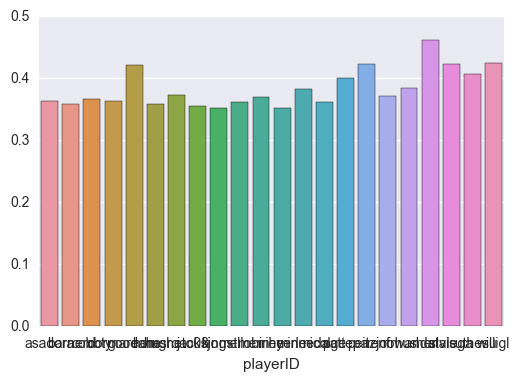

In [217]:
non_pitchers_good_hitters = good_hitters[good_hitters['H'] > 10]

sns.barplot(non_pitchers_good_hitters.index,non_pitchers_good_hitters['H']/non_pitchers_good_hitters['AB'])